In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading Data
data = pd.read_csv('data.csv')

## Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

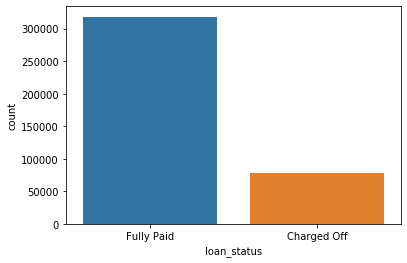

In [4]:
#Creating a countplot of predict loan_status
sns.countplot(x='loan_status', data = data)

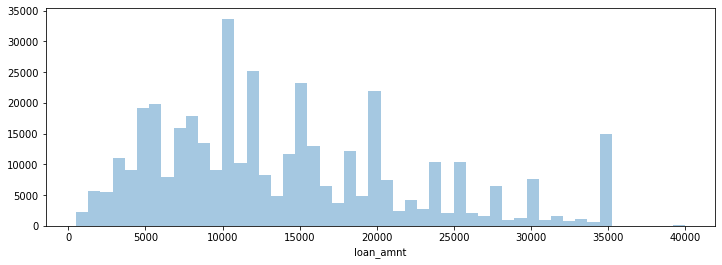

In [5]:
#Creating a histogram of the loan_amnt column.
plt.figure(figsize = (12,4))
sns.distplot(data['loan_amnt'], kde = False)

In [6]:
#Explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables
data.corr()

loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.057450    -0.098628   -0.050162 -0.014558   

                      open_acc   pub_rec  revol_bal  revol_util  total_acc  \
loan_amnt             0.198556 -0.077779   0.328320    0.099911   0.223886   
int_rate              0.011649  0.060986  -0.011280    0.293659  -0.036404   
installment           0.188973 -0.067892   0.316455    0.123915   0.202430   
annual_inc            0.136150 -0.013720   0.299773    0.027871   0.193023   
dti                   0.136181 -0.017639   0.063571    0.088375   0.102128   
open_acc              1.000000 -0.018392   0.221192   -0.131420   0.680728   
pub_rec              -0.018392  1.000000  -0.101664   -0.075910   0.019723   
revol_bal             0.221192 -0.101664   1.000000    0.226346   0.191616   
revol_util           -0.131420 -0.075910   0.226346    1.000000  -0.104273   
total_acc             0.680728  0.019723   0.191616   -0.104273   1.000000   
mort_acc              0.109205  0.011552   0.194925    0.007514   0.381072   
pub_rec_bankruptcies -0.027732  0.699408  -0.124532   -0.086751   0.042035   

                      mort_acc  pub_rec_bankruptcies  
loan_amnt             0.222315             -0.106539  
int_rate             -0.082583              0.057450  
installment           0.193694             -0.098628  
annual_inc            0.236320             -0.050162  
dti                  -0.025439             -0.014558  
open_acc              0.109205             -0.027732  
pub_rec               0.011552              0.699408  
revol_bal             0.194925             -0.124532  
revol_util            0.007514             -0.086751  
total_acc             0.381072              0.042035  
mort_acc              1.000000              0.027239  
pub_rec_bankruptcies  0.027239              1.000000

(10, 0)

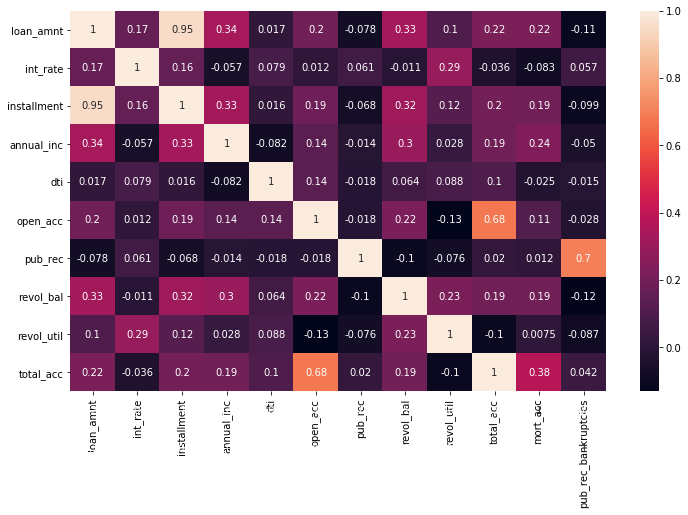

In [7]:
#Visualize this using a heatmap.
plt.figure(figsize = (12, 7))
sns.heatmap(data.corr(), annot = True)
plt.ylim(10,0)

## Notice almost perfect correlation with the "installment" feature and 'loan_amnt'

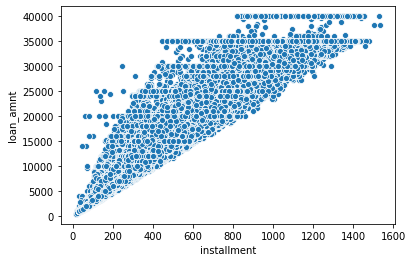

In [8]:
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = data)

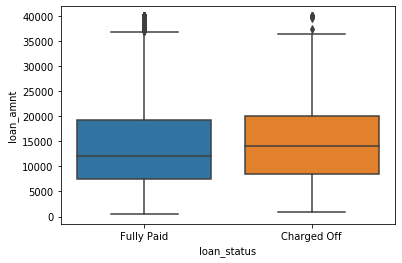

In [9]:
sns.boxplot(x='loan_status', y='loan_amnt', data = data)

In [10]:
#Exploring the Grade and SubGrade columns that LendingClub attributes to the loans
sorted(data['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

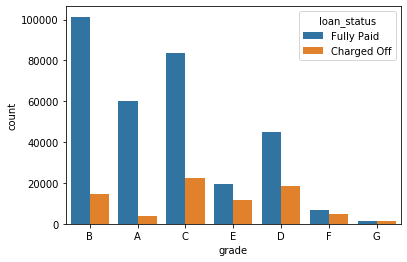

In [11]:
sns.countplot(x = 'grade', data = data, hue = 'loan_status')

In [12]:
sorted(data['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

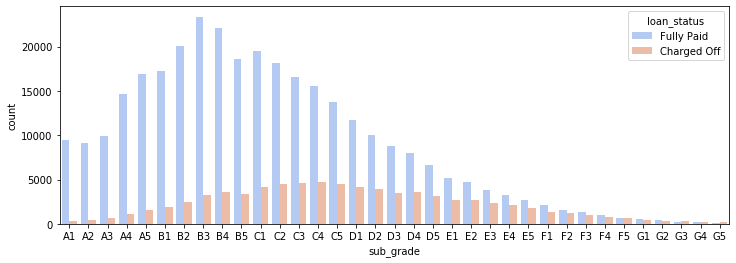

In [13]:
plt.figure(figsize = (12,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = data, order = subgrade_order, hue = 'loan_status', palette = 'coolwarm')

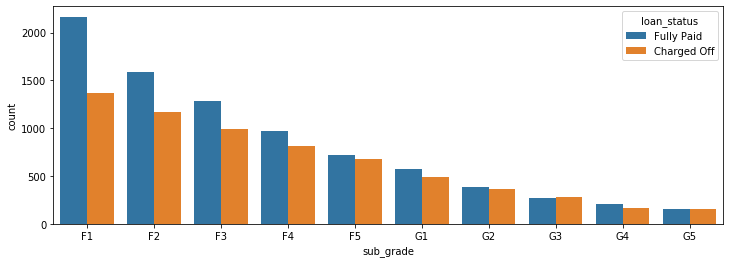

In [14]:
#It looks like F and G subgrades don't get paid back that often
f_and_g = data[(data['grade']=='G') | (data['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [15]:
# Creating a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid' : 1, 'Charged Off' :0})

In [17]:
data[['loan_repaid', 'loan_status']]

loan_repaid  loan_status
0                 1   Fully Paid
1                 1   Fully Paid
2                 1   Fully Paid
3                 1   Fully Paid
4                 0  Charged Off
...             ...          ...
396025            1   Fully Paid
396026            1   Fully Paid
396027            1   Fully Paid
396028            1   Fully Paid
396029            1   Fully Paid

[396030 rows x 2 columns]

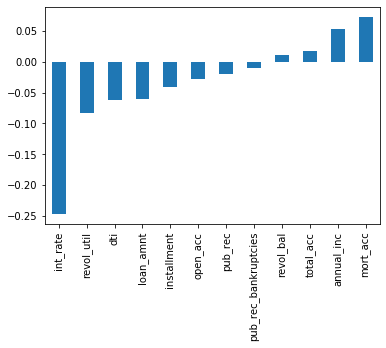

In [18]:
data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## Data Pre Processing

In [19]:
len(data)

396030

#### Checking Missing Data

In [20]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [21]:
#Convert this Series to be in term of percentage of the total DataFrame
100 * data.isnull().sum()/len(data)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [22]:
#How many unique employment job titles are there?
data['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
LEAD DRAFTER                  1
John Wiley and Sons Inc       1
Medivators, Inc               1
AGFJ                          1
Standards of Excellence       1
Name: emp_title, Length: 173105, dtype: int64

In [23]:
#Realistically there are too many unique job titles so we can delete them
data = data.drop('emp_title', axis=1)

In [24]:
sorted(data['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [25]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

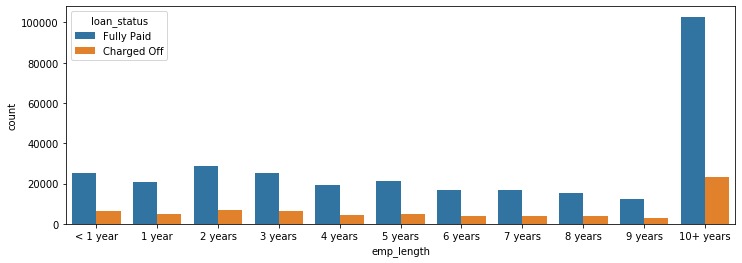

In [26]:
#Plot out the countplot with a hue separating Fully Paid vs Charged Off
plt.figure(figsize=(12,4))
sns.countplot(x = 'emp_length', data = data, order = emp_length_order, hue = 'loan_status')

##### This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category.

In [27]:
emp_co = data[data['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = data[data['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

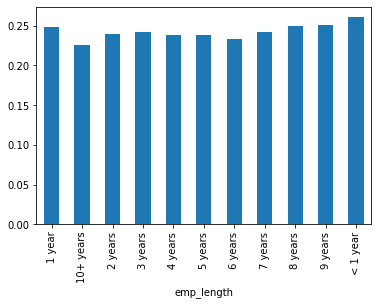

In [28]:
emp_len.plot(kind = 'bar')

In [29]:
## Charge off rates are extremely similar across all employment lengths. So we can drop the emp_length column.
data = data.drop('emp_length',axis=1)

In [30]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Review the title column vs the purpose column

In [31]:
data['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [32]:
data['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [33]:
#Title column is simply a string subcategory/description of the purpose column
data = data.drop('title', axis = 1)

In [34]:
#For 'mort_acc'
print("Correlation with the mort_acc column")
data.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

#### total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [35]:
print("Mean of mort_acc column per total_acc")
data.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

#### Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

In [36]:
total_acc_avg = data.groupby('total_acc').mean()['mort_acc']

In [37]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [38]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [39]:
data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

#### evol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we can drop them 

In [40]:
data = data.drop('revol_util', axis = 1)

In [41]:
data = data.drop('pub_rec_bankruptcies', axis = 1)

In [42]:
data.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

### Categorical Variables and Dummy Variables

In [43]:
data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [44]:
data['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [45]:
data['term'] = data['term'].apply(lambda term: int(term[:2]))

In [46]:
#We already know grade is part of sub_grade, so just drop the grade feature.
data = data.drop('grade',axis=1)

In [47]:
subgrade_dummies = pd.get_dummies(data['sub_grade'], drop_first = True)

In [48]:
data = pd.concat([data.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [49]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [50]:
data.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [51]:
dummies = pd.get_dummies(data[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
data = data.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
data = pd.concat([data,dummies],axis=1)

In [52]:
#Review the value_counts for the home_ownership column.
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [53]:
#Convert these to dummy variables, but replace NONE and ANY with OTHER
data['home_ownership'] = data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(data['home_ownership'], drop_first=True)
data = data.drop('home_ownership',axis=1)
data = pd.concat([data,dummies],axis=1)

In [54]:
#Extracting zipcode
data['zip_code'] = data['address'].apply(lambda address:address[-5:])

In [55]:
#Creating dummies
dummies = pd.get_dummies(data['zip_code'], drop_first=True)
data = data.drop(['zip_code','address'], axis=1)
data = pd.concat([data,dummies],axis=1)

In [56]:
#issue_d would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.
data = data.drop('issue_d', axis = 1)

In [57]:
data['earliest_cr_year'] = data['earliest_cr_line'].apply(lambda date:int(date[-4:]))
data = data.drop('earliest_cr_line',axis=1)

In [58]:
data = data.drop('loan_status', axis = 1)

In [59]:
#Checking again
data.select_dtypes(['object']).columns

Index([], dtype='object')

## Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = data.drop('loan_repaid', axis = 1).values
y = data['loan_repaid'].values

In [62]:
print(len(data))

396030


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

In [64]:
#Use a MinMaxScaler to normalize the feature data X_train and X_test.
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
X_train = scaler.fit_transform(X_train)

In [67]:
X_test = scaler.transform(X_test)

## Creating the Model 

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [70]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer 1
model.add(Dense(57, activation='relu'))
model.add(Dropout(0.2))

# hidden layer 2
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer 3
model.add(Dense(17, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [71]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=35,
          batch_size=219,
          validation_data=(X_test, y_test), 
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 316824 samples, validate on 79206 samples
Epoch 1/35
316824/316824 [==============================] - 6s 20us/sample - loss: 0.2977 - val_loss: 0.2611
Epoch 2/35
316824/316824 [==============================] - 6s 18us/sample - loss: 0.2655 - val_loss: 0.2600
Epoch 3/35
316824/316824 [==============================] - 6s 18us/sample - loss: 0.2636 - val_loss: 0.2596
Epoch 4/35
316824/316824 [==============================] - 6s 18us/sample - loss: 0.2629 - val_loss: 0.2591
Epoch 5/35
316824/316824 [==============================] - 6s 18us/sample - loss: 0.2621 - val_loss: 0.2597
Epoch 6/35
316824/316824 [==============================] - 6s 18us/sample - loss: 0.2618 - val_loss: 0.2592
Epoch 7/35
316824/316824 [==============================] - 6s 18us/sample - loss: 0.2613 - val_loss: 0.2589
Epoch 8/35
316824/316824 [==============================] - 5s 17us/sample - loss: 0.2609 - 

In [72]:
losses = pd.DataFrame(model.history.history)

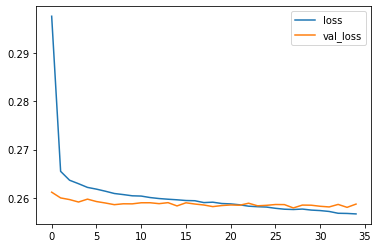

In [73]:
losses[['loss', 'val_loss']].plot()

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
show = model.predict_classes(X_test)

In [76]:
print(classification_report(y_test, show))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [77]:
confusion_matrix(y_test, show)

array([[ 6838,  8655],
       [  123, 63590]], dtype=int64)